Let's try 3 regressors on auxhist dataset

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataDIR = 'af'
DS = xr.open_dataset(dataDIR)

In [3]:
albedo = DS.ALBEDO.values

In [4]:
albedo.shape #days, latitude, longtitude

(71, 36, 72)

In [5]:
d_c = DS.TAU_OD.values

In [6]:
d_c.shape 

(71, 52, 36, 72)

In [7]:
tsf = DS.TOASW.values #top solar flux

In [8]:
tsf.shape

(71, 36, 72)

In [9]:
bsf = DS.GSW.values #bottom solar flux, ouput

In [10]:
bsf2 = bsf/(1-albedo)

In [11]:
bsf.shape

(71, 36, 72)

Let's combine the data together for ten time samples, with full latitude and longitude:

In [12]:
e_t = [] #equator input and output
#input:
for k in range(10): #10 days
    for i in range(36):
        for j in range(72):
            input_array = list(d_c[k,:,i,j]) #add dust profile
            input_array.append(tsf[k,i,j]) #add top solar flux, without the albedo factor
            input_array.append(bsf2[k,i,j])            
            e_t.append(input_array) #appends input to input array

In [13]:
e_t = np.array(e_t)
e_t.shape

(25920, 54)

In [14]:
e_d = pd.DataFrame(e_t) 
e_d = e_d[e_d.iloc[:,52] != 0] #remove 0 tsf, could later use a simple classifier to determine which data has 0 bottom flux...
e_d

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
2592,0.074773,0.074461,0.073992,0.073209,0.072426,0.071643,0.070858,0.070073,0.069288,0.068501,...,6.870778e-08,4.828668e-08,3.302351e-08,2.181589e-08,1.379160e-08,8.190756e-09,4.479549e-09,2.268331e-09,3.133222,1.288925
2593,0.074851,0.074538,0.074069,0.073286,0.072502,0.071718,0.070933,0.070147,0.069360,0.068573,...,6.877530e-08,4.833389e-08,3.305554e-08,2.183677e-08,1.380450e-08,8.198081e-09,4.483181e-09,2.269765e-09,3.225646,1.327118
2594,0.074881,0.074568,0.074098,0.073315,0.072531,0.071746,0.070961,0.070175,0.069388,0.068601,...,6.880115e-08,4.835196e-08,3.306780e-08,2.184476e-08,1.380943e-08,8.200886e-09,4.484573e-09,2.270314e-09,3.133214,1.289217
2595,0.074862,0.074549,0.074080,0.073297,0.072513,0.071729,0.070943,0.070158,0.069371,0.068583,...,6.878514e-08,4.834077e-08,3.306021e-08,2.183981e-08,1.380637e-08,8.199148e-09,4.483712e-09,2.269974e-09,2.856627,1.175603
2596,0.074796,0.074483,0.074014,0.073232,0.072448,0.071665,0.070880,0.070095,0.069309,0.068522,...,6.872747e-08,4.830045e-08,3.303285e-08,2.182198e-08,1.379536e-08,8.192893e-09,4.480609e-09,2.268749e-09,2.397990,0.987387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,0.120338,0.119857,0.119135,0.117931,0.116728,0.115525,0.114321,0.113118,0.111914,0.110711,...,1.091246e-07,7.654454e-08,5.219346e-08,3.431266e-08,2.151059e-08,1.257493e-08,6.654015e-09,3.126207e-09,166.324509,145.346939
25916,0.120377,0.119895,0.119173,0.117969,0.116766,0.115562,0.114358,0.113154,0.111951,0.110747,...,1.091595e-07,7.656890e-08,5.220998e-08,3.432344e-08,2.151725e-08,1.257871e-08,6.655889e-09,3.126946e-09,167.173706,146.184647
25917,0.120411,0.119929,0.119207,0.118003,0.116799,0.115594,0.114390,0.113186,0.111982,0.110778,...,1.091901e-07,7.659027e-08,5.222449e-08,3.433289e-08,2.152309e-08,1.258202e-08,6.657535e-09,3.127596e-09,167.877502,146.876816
25918,0.120440,0.119959,0.119236,0.118032,0.116827,0.115623,0.114418,0.113214,0.112010,0.110805,...,1.092166e-07,7.660883e-08,5.223708e-08,3.434110e-08,2.152816e-08,1.258490e-08,6.658964e-09,3.128160e-09,168.430542,147.418060


In [15]:
np.percentile(e_d.iloc[:,52], 20)

70.82975769042967

Split up the data into 3 parts:

In [16]:
e_reml = e_d[e_d.iloc[:,52] > 235] #large flux data, 75th to 100th percentile
e_remm = e_d[e_d.iloc[:,52] <= 235]
e_remm = e_remm[e_remm.iloc[:,52] > 20]#middle flux data, 5th to 75th percentile
e_rems = e_d[e_d.iloc[:,52] <= 20] #small flux data, greater than 10% of the average

Train three linear regressors, one for the large flux data and the other for small flux data:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_set, test_set = train_test_split(e_reml, test_size=0.2, random_state=42)

train_in = train_set.iloc[:,:53] #training input
train_out = train_set.iloc[:,53] #training output
test_in = test_set.iloc[:,:53] #testing input 
test_out = test_set.iloc[:,53] #testing output

w = 1/train_out**2
lrl = LinearRegression() #linear regression for large flux data
lrl.fit(train_in,train_out, sample_weight=w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
train_set, test_set = train_test_split(e_remm, test_size=0.2, random_state=42)

train_in = train_set.iloc[:,:53] #training input
train_out = train_set.iloc[:,53] #training output
test_in = test_set.iloc[:,:53] #testing input 
test_out = test_set.iloc[:,53] #testing output

w = 1/train_out**2
lrm = LinearRegression() #linear regression for middle flux data
lrm.fit(train_in,train_out, sample_weight=w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
train_set, test_set = train_test_split(e_rems, test_size=0.2, random_state=42)

train_in = train_set.iloc[:,:53] #training input
train_out = train_set.iloc[:,53] #training output
test_in = test_set.iloc[:,:53] #testing input
test_out = test_set.iloc[:,53] #testing output

w = 1/train_out**2
lrs = LinearRegression() #linear regression for small flux data
lrs.fit(train_in,train_out, sample_weight=w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

A custom predictor which can handle all the data:

In [20]:
def clp(in_data): #custom linear predictor
    in_data = np.array(in_data)
    out_data = []
    for instance in in_data:
        if instance[52] > 235:
            out_data.append(float(lrl.predict(instance[:53].reshape(1,-1)))) #uses large flux predictor 
        elif instance[52] > 20:
            out_data.append(float(lrm.predict(instance[:53].reshape(1,-1)))) #uses middle flux predictor 
        else:
            out_data.append(float(lrs.predict(instance[:53].reshape(1,-1)))) #uses small flux predictor
    return np.array(out_data)

In [21]:
def int_err(pred, real, real_in, r): 
    areas = []
    for i in range(len(real)):
        A1 = np.cos((np.pi/36)*((real_in.index[i]//72)%36))
        A2 = np.cos((np.pi/36)*(((real_in.index[i]//72)+ 1)%36))
        if((((real_in.index[i]//72)+ 1)%36) == 0):
            A2 = -1
        dA = (A1 - A2)/72 * 2 * np.pi * r**2 #area increment
        areas.append(dA)
    areas = np.array(areas)
    return np.sum((np.array(pred) - np.array(real))*areas)

In [22]:
def int_err2(pred, real, real_in, r): 
    areas = []
    for i in range(len(real)):
        dA =  -r**2 * np.sin((np.pi/36)*((real_in.index[i]//72)%36)) * (np.pi/36) * (np.pi/36)  #area increment
        areas.append(dA)
    areas = np.array(areas)
    return np.sum((np.array(pred) - np.array(real))*areas)

In [23]:
total_in = e_d.iloc[:,:53] #total input
total_out = e_d.iloc[:,53] #total output

In [24]:
import time

start = time.time()
total_pred = clp(total_in)
end = time.time()
print(end - start)

2.0804014205932617


In [25]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(total_out, total_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse  

3.9921835917428243

In [26]:
err1 = int_err(total_pred, total_out, total_in, 3.39e6) #the integral of the error
np.array(err1)

array(-6.37785278e+14)

In [27]:
err2 = int_err2(total_pred, total_out, total_in, 3.39e6) #the integral of the error
np.array(err2)

array(6.34889614e+14)

In [28]:
e_t2 = pd.DataFrame(e_t)
int_err(np.zeros(36*72), np.ones(36*72), e_t2[:36*72], 1) #make sure the errors work by integrating a sphere's surface

-12.566370614359172

In [29]:
f_err = err2/(1.44e14)
f_err

4.408955652476091

Plotting data:

In [30]:
all_indices = total_in.index
ti_indices = all_indices[all_indices > 5*36*72] 
ti_indices = ti_indices[ti_indices < 6 *36*72] 
ti_indices #ith time snapshot indices for latitude/longtitude map, currently set to 6th time snapshot

Int64Index([13104, 13105, 13106, 13107, 13108, 13109, 13110, 13111, 13112,
            13170,
            ...
            15542, 15543, 15544, 15545, 15546, 15547, 15548, 15549, 15550,
            15551],
           dtype='int64', length=1324)

In [31]:
total_out = np.array(total_out)
full_out_contour = np.full((36, 72), np.nan)
full_pred_contour = np.full((36, 72), np.nan)
for index in ti_indices:
    lat_point = index//72 - 36*5
    long_point = index%72 - 1*72
    full_out_contour[lat_point][long_point] = total_out[np.where(all_indices == index)]
    full_pred_contour[lat_point][long_point] = total_pred[np.where(all_indices == index)]

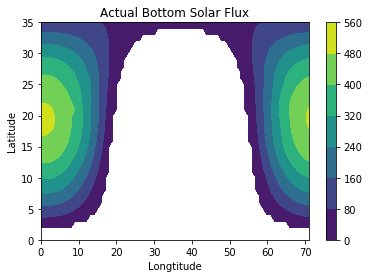

<Figure size 432x288 with 0 Axes>

In [32]:
plt.contourf(full_out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Actual")

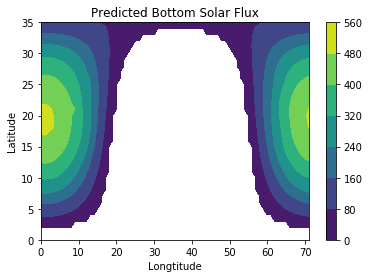

<Figure size 432x288 with 0 Axes>

In [33]:
plt.contourf(full_pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Predicted")

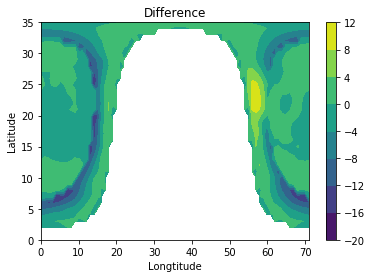

In [34]:
plt.contourf(full_pred_contour - full_out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

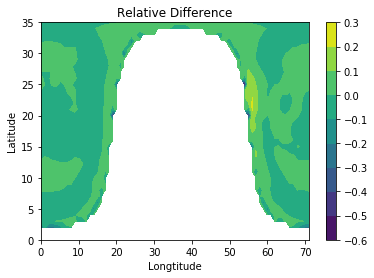

In [35]:
plt.contourf((full_pred_contour - full_out_contour)/full_out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

Predictor trying to just minimize MSE (not relative error):

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_set, test_set = train_test_split(e_reml, test_size=0.2, random_state=42)

train_in = train_set.iloc[:,:53] #training input
train_out = train_set.iloc[:,53] #training output
test_in = test_set.iloc[:,:53] #testing input 
test_out = test_set.iloc[:,53] #testing output

ol = LinearRegression() #linear regression for large flux data
ol.fit(train_in,train_out) #old linear regressor for large fluxes, equal weights (so relative error should be worse)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
train_pred = ol.predict(train_in)
print(np.max((train_pred - train_out)/train_out)) 
print(np.min((train_pred - train_out)/train_out)) #relative errors in training set here are pretty small:

0.00713897030800581
-0.011343170888721943


In [38]:
train_set, test_set = train_test_split(e_remm, test_size=0.2, random_state=42)

train_in = train_set.iloc[:,:53] #training input
train_out = train_set.iloc[:,53] #training output
test_in = test_set.iloc[:,:53] #testing input 
test_out = test_set.iloc[:,53] #testing output


om = LinearRegression() #linear regression for middle flux data
om.fit(train_in,train_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
train_pred = om.predict(train_in)
print(np.max((train_pred - train_out)/train_out)) 
print(np.min((train_pred - train_out)/train_out)) #already large relative errors

0.07799455523490906
-2.136744260787964


In [40]:
train_set, test_set = train_test_split(e_rems, test_size=0.2, random_state=42)

train_in = train_set.iloc[:,:53] #training input
train_out = train_set.iloc[:,53] #training output
test_in = test_set.iloc[:,:53] #testing input
test_out = test_set.iloc[:,53] #testing output

os = LinearRegression() #linear regression for small flux data
os.fit(train_in,train_out) #old linear regressor for small fluxes

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
train_pred = os.predict(train_in)
print(np.max((train_pred - train_out)/train_out)) 
print(np.min((train_pred - train_out)/train_out)) #really large relative errors

111.5554428100586
-10205.75390625


In [42]:
def oclp(in_data): #"old" custom linear predictor
    in_data = np.array(in_data)
    out_data = []
    #lout_data, mout_data, sout_data = [], [], [] #get the seperate large, medium, small output data
    #lr_data, lm_data, ls_data = [], [], []  #get the seperate large, medium, small real data (needs to be in the same order)
    for instance in in_data:
        if instance[52] > 235:
            out_data.append(float(ol.predict(instance[:53].reshape(1,-1)))) #uses large flux predictor
        elif instance[52] > 20:
            out_data.append(float(om.predict(instance[:53].reshape(1,-1)))) #uses middle flux predictor 
        else:
            out_data.append(float(os.predict(instance[:53].reshape(1,-1)))) #uses small flux predictor
    return np.array(out_data)

In [43]:
total_in = e_d.iloc[:,:53] #total input
total_out = e_d.iloc[:,53] #total output

In [44]:
total_o_pred = oclp(total_in) #total predicted with "old" predictor
tore = np.array((total_o_pred - total_out)/total_out)#total old relative error

In [45]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(total_out, total_o_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse  #lower, as expected

1.7241509252859069

In [46]:
np.array(int_err(total_o_pred, total_out, total_in, 3.39e6)) #smaller than the relative error method

array(-1.33194555e+13)

In [47]:
tore_contour = np.full((36, 72), np.nan)
for index in ti_indices:
    lat_point = index//72 - 36*5
    long_point = index%72 - 1*72
    tore_contour[lat_point][long_point] = tore[np.where(all_indices == index)]

In [48]:
total_out = np.array(total_out)
full_o_pred_contour = np.full((36, 72), np.nan)
for index in ti_indices:
    lat_point = index//72 - 36*5
    long_point = index%72 - 1*72
    full_o_pred_contour[lat_point][long_point] = total_o_pred[np.where(all_indices == index)]

In [49]:
len(ti_indices) #non nan values

1324

In [50]:
noo = 0 #number of outliers
for i in range(36):
    for j in range(72):
        if(tore_contour[i,j] < -1 or tore_contour[i,j] > 1):
            tore_contour[i,j] = np.nan
            noo += 1
noo #18/1320 is around 1.4%, pretty small

19

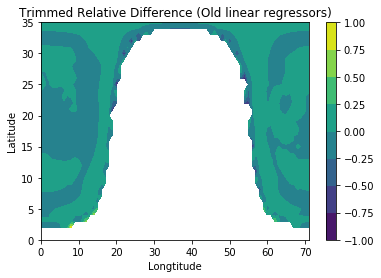

In [51]:
plt.contourf(tore_contour) #vmin = -1, vmax = 1) #levels=np.linspace(-1,1,50))
plt.colorbar()
plt.title("Trimmed Relative Difference (Old linear regressors)")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

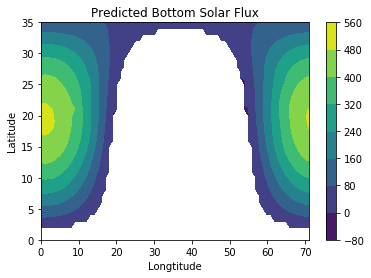

In [52]:
plt.contourf(full_o_pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show() #this also shows the right structure

In [53]:
def rh(in_data): #shows which regressor handles which data
    in_data = np.array(in_data)
    out_data = []
    for instance in in_data:
        if instance[52] > 235:
            out_data.append(2) 
        elif instance[52] > 20:
            out_data.append(1)
        else:
            out_data.append(0)
    return np.array(out_data)

In [54]:
lr = rh(total_in) #labelling which regressor handles which data points

lr_contour = np.full((36, 72), np.nan)
for index in ti_indices:
    lat_point = index//72 - 36*5
    long_point = index%72 - 1*72
    lr_contour[lat_point][long_point] = lr[np.where(all_indices == index)]

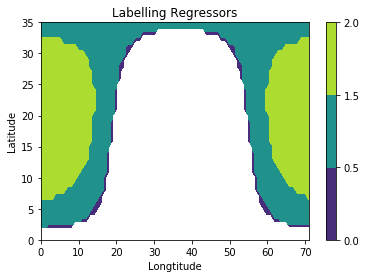

<Figure size 432x288 with 0 Axes>

In [55]:
plt.contourf(lr_contour, levels=[0,0.5,1.5,2])
plt.colorbar()
plt.title("Labelling Regressors")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Actual")